In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.preprocessing import scale, robust_scale

import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.avragg as avragg
import mlgrad.loss as loss
import mlgrad.regr as regr

In [2]:
df = pd.read_csv("../data/quality_measure.csv", sep='\t', index_col='id')
df

,x,y
id,,
1,71.6,74.1
2,91.3,90.4
3,71.8,92.6
4,72.6,81.6
5,67.4,97.7
6,55.2,70.3
7,56.8,56.0
8,74.6,71.9
9,75.9,72.1


In [3]:
X = df["x"].values
Y = df["y"].values
N = len(X)
alpha = (N-4)/N
print(alpha)

0.7333333333333333


In [33]:
X = scale(X)
Y = scale(Y)
Xs = X[:,None]
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()

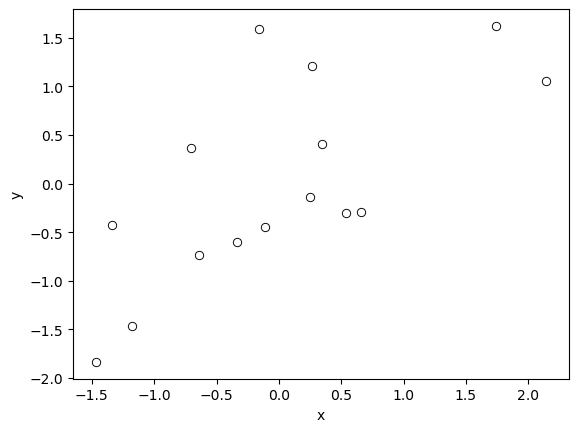

In [34]:
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
AB = np.array([[xmin-0.5], [xmax+0.5]])
print(AB)
mod_ls = models.LinearModel(1)
mod_r = models.LinearModel(1)
mod_m = models.LinearModel(1)
mod_wm = models.LinearModel(1)
mod_ls2 = models.LinearModel(1)

[[-1.970]
 [ 2.645]]


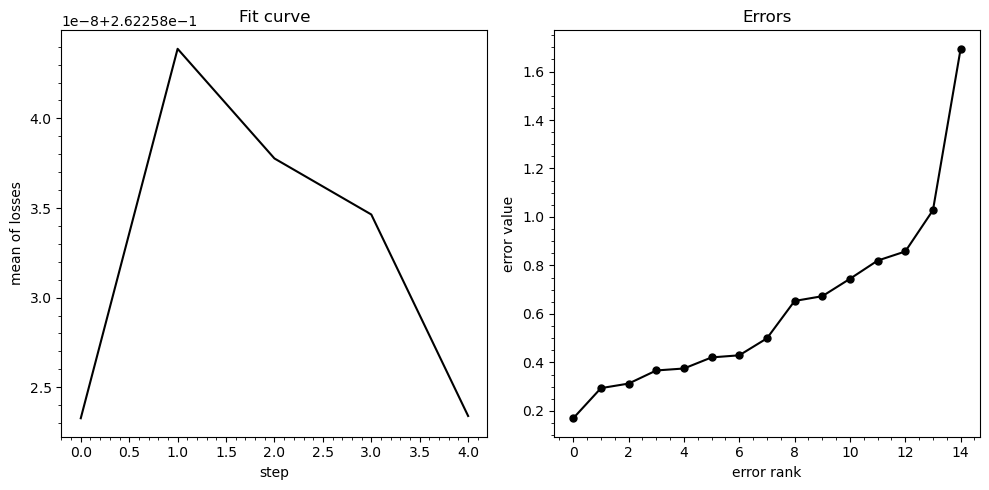

In [38]:
regr_ls = regr.regression(Xs, Y, mod_ls, h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_ls, Xs, Y)

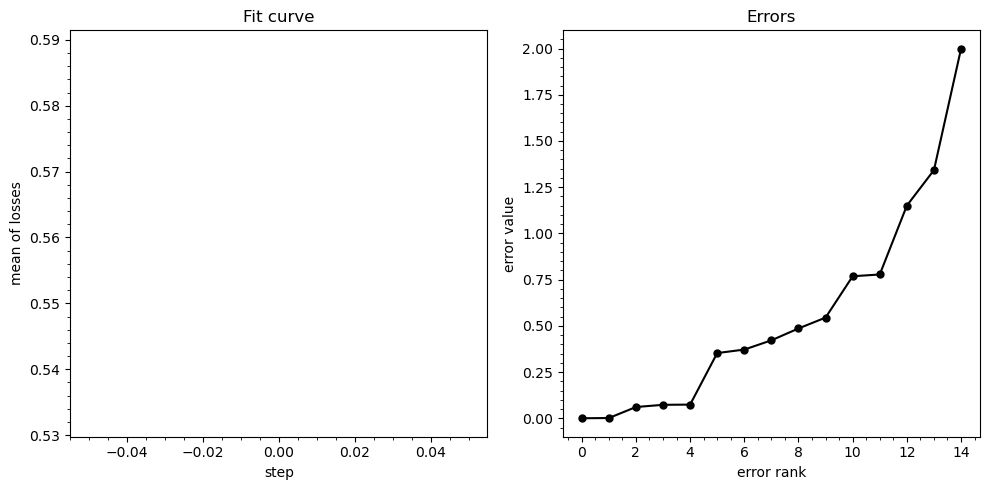

In [40]:
regr_r = regr.r_regression_irls(Xs, Y, mod_r, funcs.Sqrt(0.001), h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_r, Xs, Y)

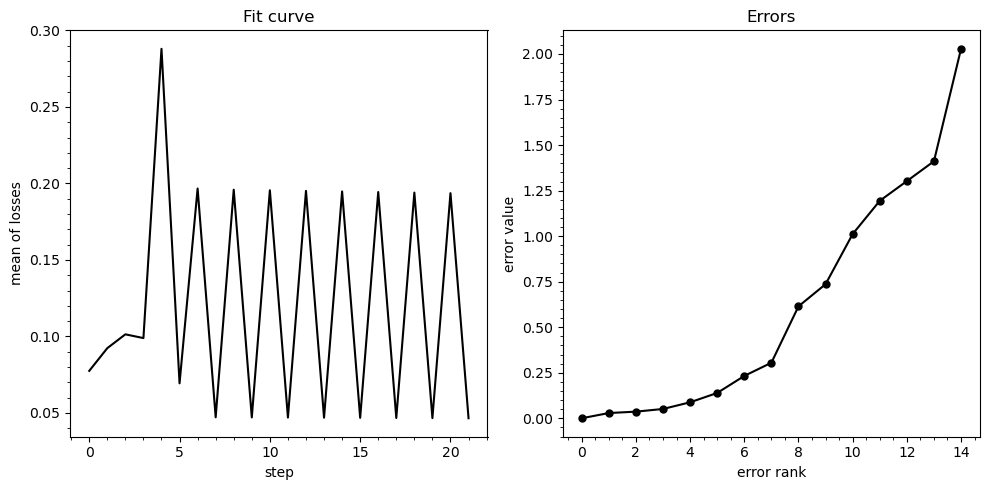

In [42]:
avrfunc_m = regr.averaging_function("M", funcs.Sqrt(0.001))
regr_m = regr.m_regression_irls(Xs, Y, mod_m, agg_func=avrfunc_m, h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_m, Xs, Y)

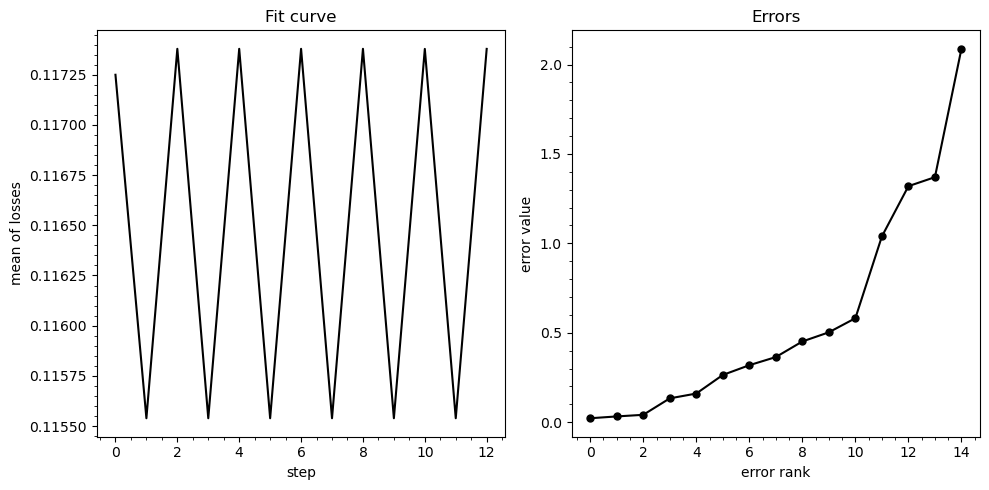

In [51]:
avrfunc_wm = regr.averaging_function("WM", funcs.quantile_func(alpha, funcs.Sqrt(0.001)))
regr_wm = regr.m_regression_irls(Xs, Y, mod_wm, agg_func=avrfunc_wm, h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_wm, Xs, Y)

In [45]:
X_wo, Y_wo = regr.exclude_outliers(mod_wm, X, Y, 4)

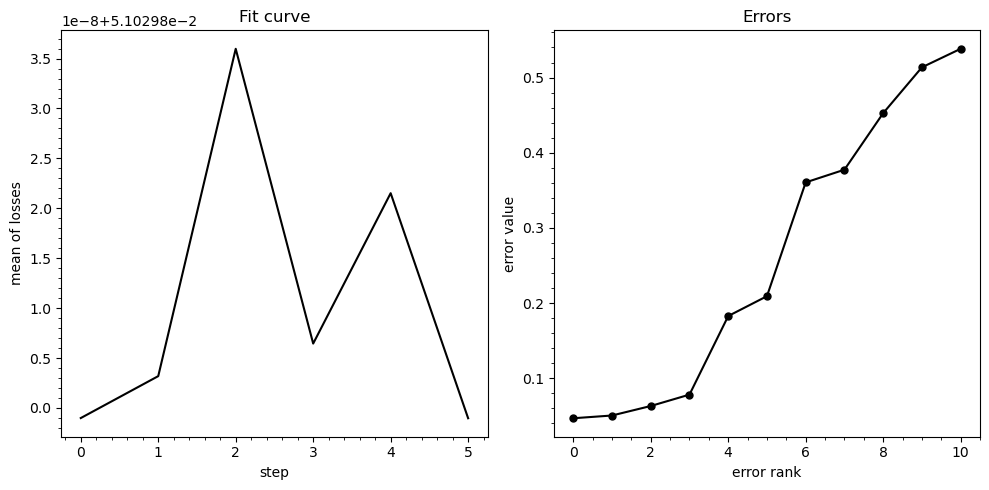

In [48]:
regr_ls2 = regr.regression(X_wo[:,None], Y_wo, mod_ls2, h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_ls2, X_wo[:,None], Y_wo)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


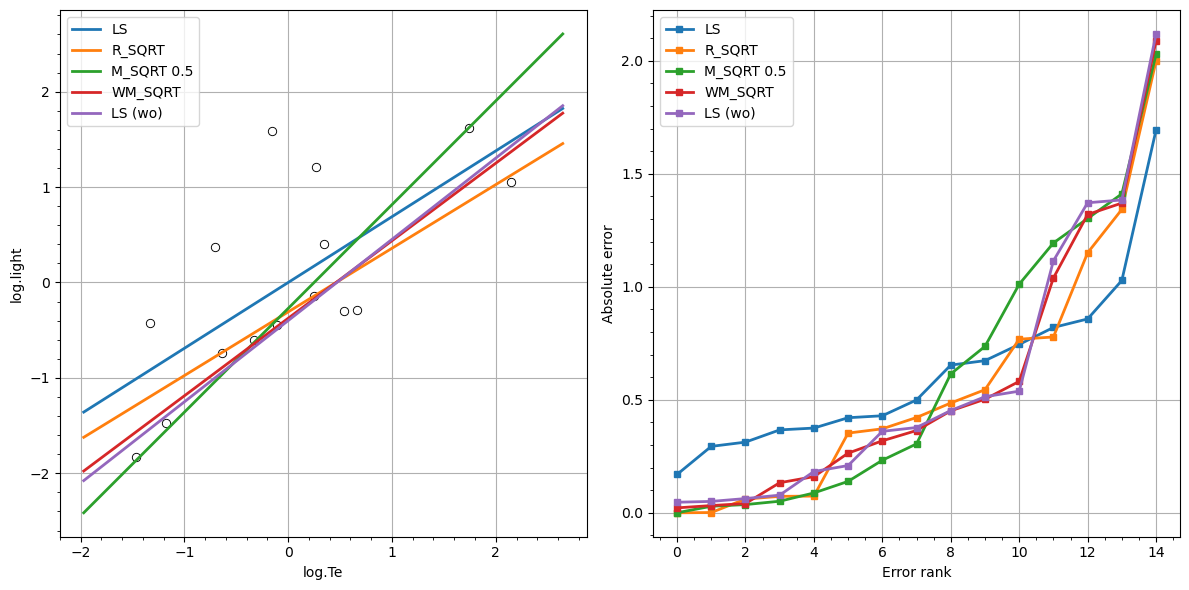

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.plot(AB, mod_ls.evaluate_all(AB), label='LS', linewidth=2.)
plt.plot(AB, mod_r.evaluate_all(AB), label='R_SQRT', linewidth=2.)
plt.plot(AB, mod_m.evaluate_all(AB), label='M_SQRT 0.5', linewidth=2.)
plt.plot(AB, mod_wm.evaluate_all(AB), label='WM_SQRT', linewidth=2.)
plt.plot(AB, mod_ls2.evaluate_all(AB), label='LS (wo)', linewidth=2.)
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.subplot(1,2,2)
plt.plot(sorted(np.abs(Y-mod_ls.evaluate_all(Xs))), label='LS', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_r.evaluate_all(Xs))), label='R_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_m.evaluate_all(Xs))), label='M_SQRT 0.5', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_wm.evaluate_all(Xs))), label='WM_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_ls2.evaluate_all(Xs))), label='LS (wo)', linewidth=2., marker='s', markersize=4)
plt.legend()
plt.minorticks_on()
plt.xlabel('Error rank')
plt.ylabel('Absolute error')
plt.grid(1)
plt.tight_layout()
plt.savefig('fig/rob_linregr_starsCYG.eps')
plt.show()

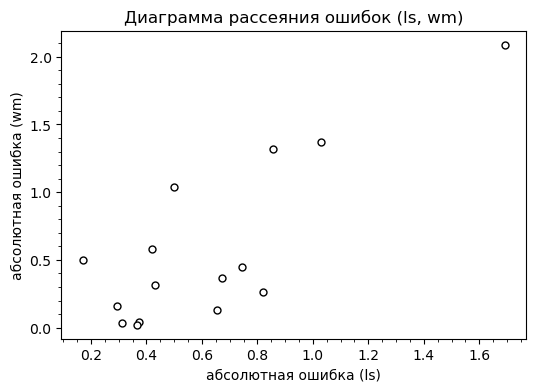

In [50]:
plt.figure(figsize=(6,4))
errs1 = np.abs(mod_ls.evaluate_all(X[:,None]) - Y)
errs2 = np.abs(mod_wm.evaluate_all(X[:,None]) - Y)
plt.title('Диаграмма рассеяния ошибок (ls, wm)')
plt.scatter(errs1, errs2, s=25, c='w', edgecolors='k')
# plt.savefig('fig/simple_linear_regression_errs_roberrs.eps')
plt.xlabel('абсолютная ошибка (ls)')
plt.ylabel('абсолютная ошибка (wm)')
plt.minorticks_on()
plt.show()

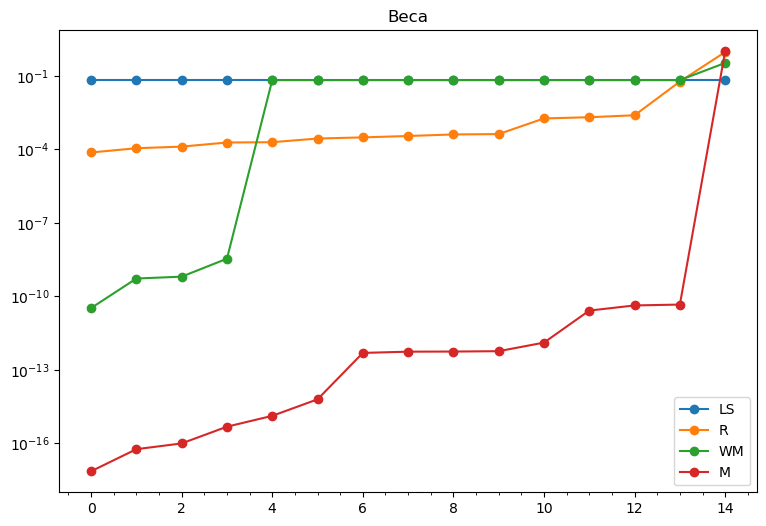

In [15]:
plt.figure(figsize=(9,6))
plt.title("Веса")
regr.plot_sample_weights(regr_ls, 'LS')
regr.plot_sample_weights(regr_r, 'R')
regr.plot_sample_weights(regr_wm, 'WM')
regr.plot_sample_weights(regr_m, 'M')
plt.minorticks_on()
plt.gca().set_yscale('log')
plt.legend()
plt.show()

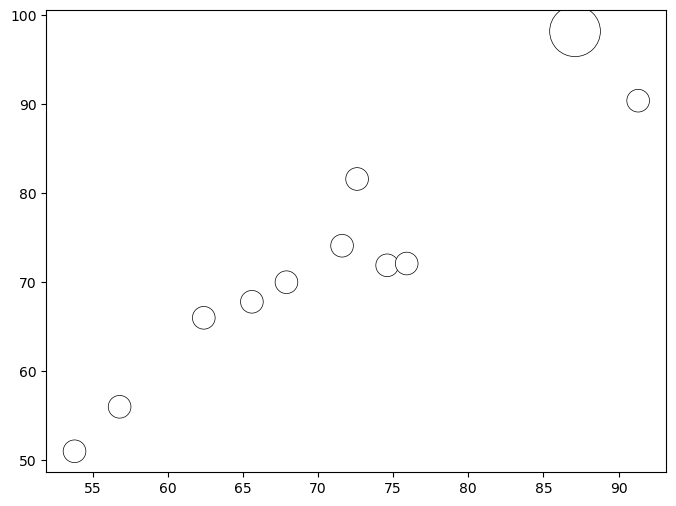

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=4000.*regr_wm.sample_weights, c='w', edgecolors='k', linewidth=0.5)
plt.show()